In [1]:
# Dependencies
import cv2
import numpy as np
import pandas as pd

import os
import png
import glob
import pickle
import random
from tqdm import tqdm

import pydicom
from pydicom.data import get_testdata_files

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Utils

def sort_DcmFiles(dcm_paths):
    
    sorted_dcm_paths = ['' for i in range(len(dcm_paths))]
    
    try:
        for n, path in enumerate(dcm_paths):
            dataset = pydicom.dcmread(path)
            sorted_dcm_paths[int(dataset.InstanceNumber) - 1] = path

        return sorted_dcm_paths

    except:
        return dcm_paths

def image_3D(sorted_paths, rows, cols):
    
    #image_array = np.zeros((len(sorted_paths), rows, cols))

    image_list = []

    for n, path in enumerate(sorted_paths):
        print(path)
        dataset = pydicom.dcmread(path)                  # Read dcm file
        image = dataset.pixel_array                      # Get image from dcm file
#         if image is None:
#             print(path, n)
#             continue
        image_list.append(cv2.resize(image, (224, 224)))  # pre-process the image
           
    return np.array(image_list)


def get_PatientInfo(dcm_FilePath, num_paths, exam, df):
    
    dataset = pydicom.dcmread(dcm_FilePath)
    print("Instance number / Total instance .. {}/{}".format(str(dataset.InstanceNumber), num_paths))
    print("EDSS score ... {}".format(df[df['Sequence_id'] == int(random_exam)]['EDSS'].values[0]))
    print("Patient id.......:", dataset.PatientID)
    print("Patient Sex.......:", dataset.PatientSex)
    print("Patient Weight.......:", dataset.PatientWeight)
    print("Acquisition Date.......:", dataset.AcquisitionDate)
    print("Pregnancy Status.......:", dataset.PregnancyStatus)
    print("Patient BirthDate.......:", dataset.PatientBirthDate)
    print("Image shape.......:", dataset.pixel_array.shape)
    print("Modality.........:", dataset.Modality)
    print("Study Date.......:", dataset.StudyDate)
    print("")
    plt.imshow(dataset.pixel_array, cmap='gray')
    plt.show()
    
    return dataset.pixel_array.shape
    
def plot_3DImage(image_array, cols=5):
    
    rows = image_array.shape[0] // cols + 1
    fig = plt.figure(figsize=(30, 5*rows))
    
    for n, image in enumerate(image_array):
        print(n)
        ax = fig.add_subplot(rows, cols, n+1)
        ax.imshow(image, cmap='gray')
        plt.subplots_adjust(wspace=0.35, hspace=0.35)
        plt.title("slice_" + str(n))
        
def read_xls(file_path):
    
    return pd.read_excel(file_path, sheet_name='Feuil1')
     

In [62]:
base_path = '/home/alex/Dataset2/'
exams = [i.split('/')[-1] for i in glob.glob(base_path + '*')]
random_exam = random.choice(exams)
dcm_paths = glob.glob(base_path + random_exam + '/*.dcm')
sorted_paths = sort_DcmFiles(dcm_paths)

file_path = '/home/alex/Dataset2/Dataset - 2.xlsx'
df = read_xls(file_path)

Instance number / Total instance .. 151/176
EDSS score ... 1.5
Patient id.......: 0230037
Patient Sex.......: M
Patient Weight.......: 67
Acquisition Date.......: 20170207
Pregnancy Status.......: 0
Patient BirthDate.......: 19700101
Image shape.......: (256, 256)
Modality.........: MR
Study Date.......: 20170207



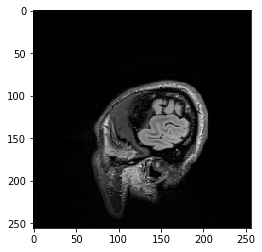

In [63]:
# Get patient information 
rows, cols, = get_PatientInfo(dcm_paths[0], len(dcm_paths), random_exam, df)

/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130960564743284.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130929450143120.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130928873543113.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130966127343310.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130955370743262.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130912390343026.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130920056043079.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130919616843077.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130936981943157.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130949905243233.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130966970043313.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.201702071513096799842978.dcm
/home

/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130940457143177.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130913072643041.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130961024643285.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130967630843316.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130951343843239.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130959667043279.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130939916643173.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130960269343282.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130954200043250.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130931371843128.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130964720443305.dcm
/home/alex/Dataset2/20678/1.3.12.2.1107.5.2.19.45212.2017020715130955214243260.dcm
/hom

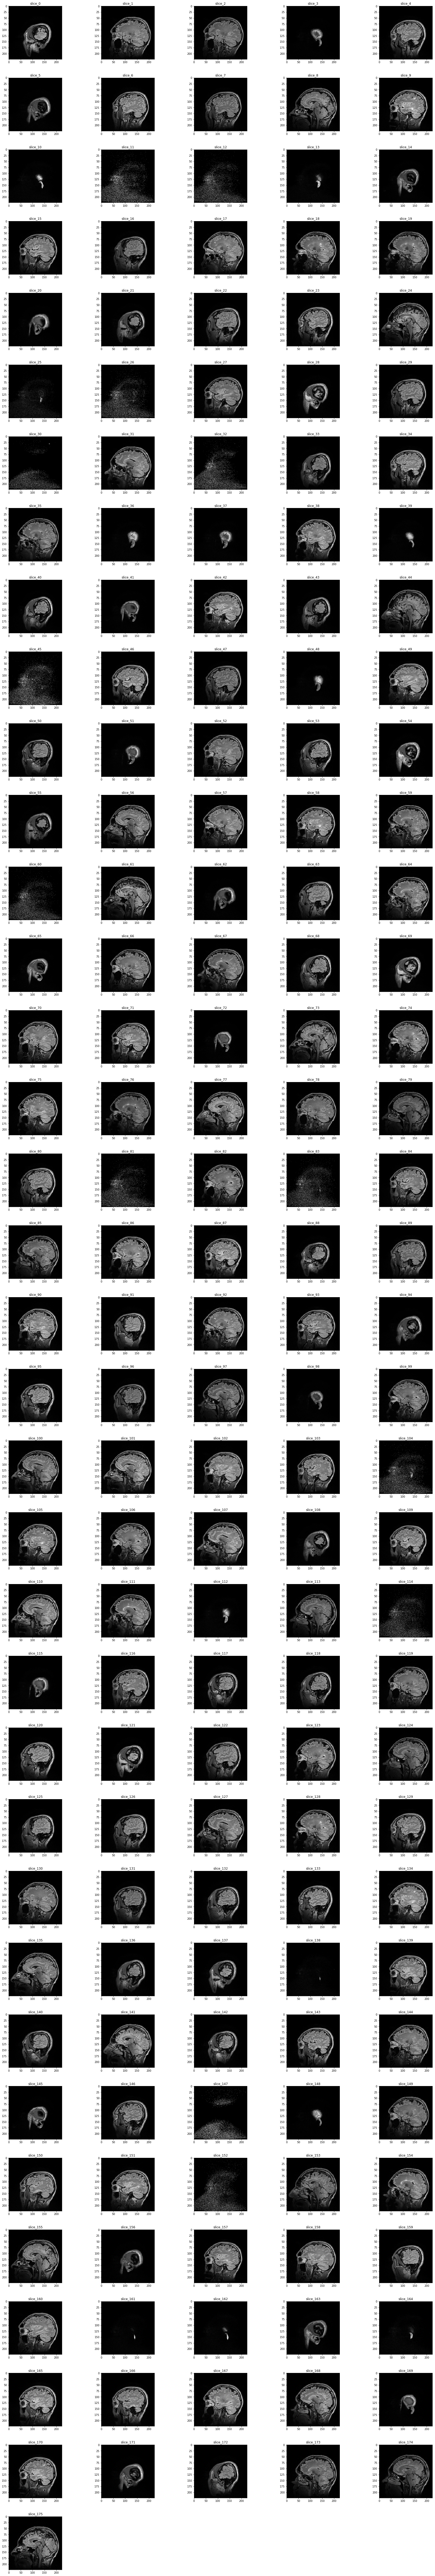

In [64]:
# Plot patient MRI images
#dcm_paths.pop(dcm_paths.index('/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480869998469389.dcm'))
image_array = image_3D(dcm_paths, rows, cols)
plot_3DImage(image_array)

# Data Exploration

In [65]:
file_path = '/home/alex/Dataset2/Dataset - 2.xlsx'

In [66]:
df = read_xls(file_path)
df.head()

Sequence_id  age sexe  EDSS examination_date
0         7371   47    M   6.0       2016-06-10
1         7377   35    F   1.0       2016-03-10
2         7411   44    F   3.5       2016-05-13
3         7422   28    M   4.0       2015-09-11
4         7442   19    F   0.0       2016-01-08

In [100]:
df[df['Sequence_id'] == 7525]['EDSS'].values[0]

2.5

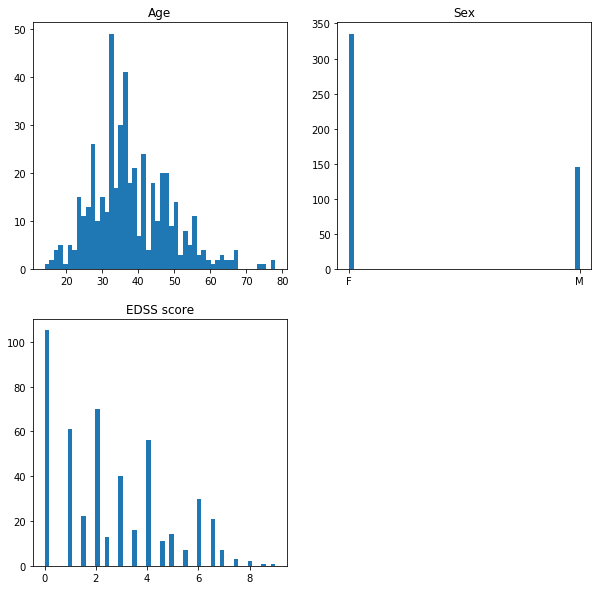

In [73]:
## Stats concerning the xls file 
fig = plt.figure(figsize=(10,10))

rows = 2
cols = 2

ax = fig.add_subplot(rows, cols, 1)
ax.hist(df['age'].tolist(), bins=50)
plt.title("Age")

ax = fig.add_subplot(rows, cols, 2)
ax.hist(df['sexe'].tolist(), bins=50)
plt.title("Sex")

ax = fig.add_subplot(rows, cols, 3)
ax.hist(df['EDSS'].tolist(), bins=50)
plt.title("EDSS score")

plt.show()

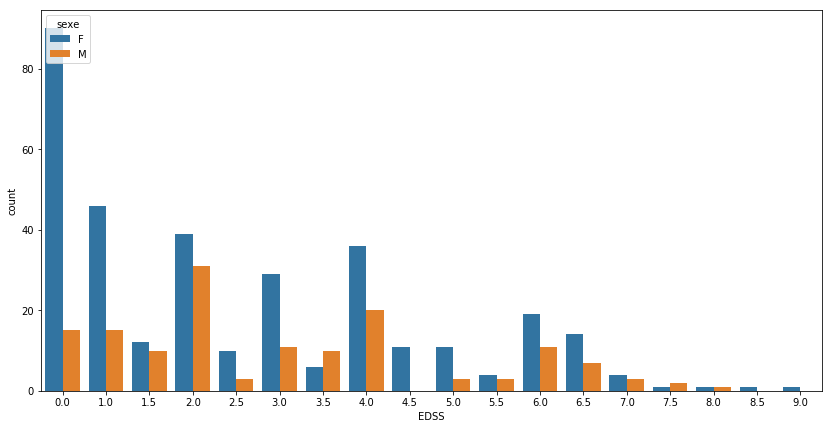

In [64]:
plt.figure(figsize=(14,7))

sns.countplot(x='EDSS',data=df, hue='sexe')

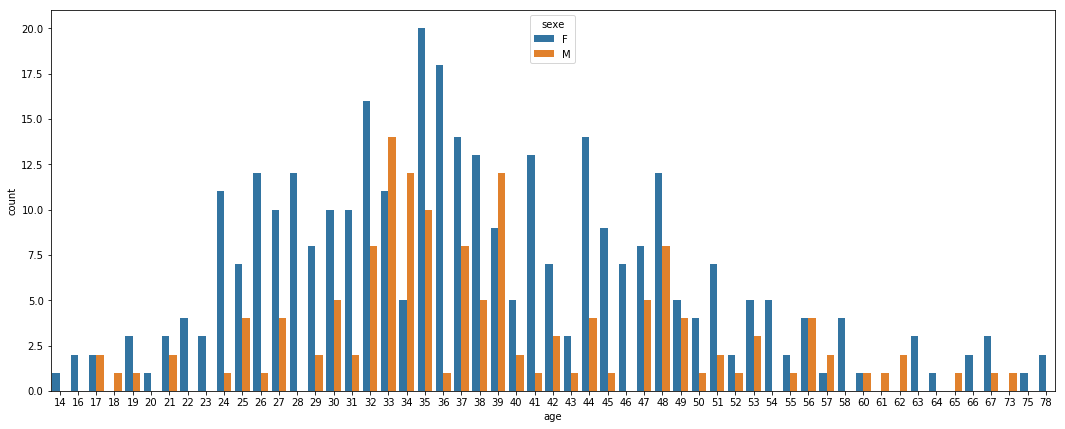

In [66]:
plt.figure(figsize=(18,7))
sns.countplot(x='age',data=df, hue='sexe')

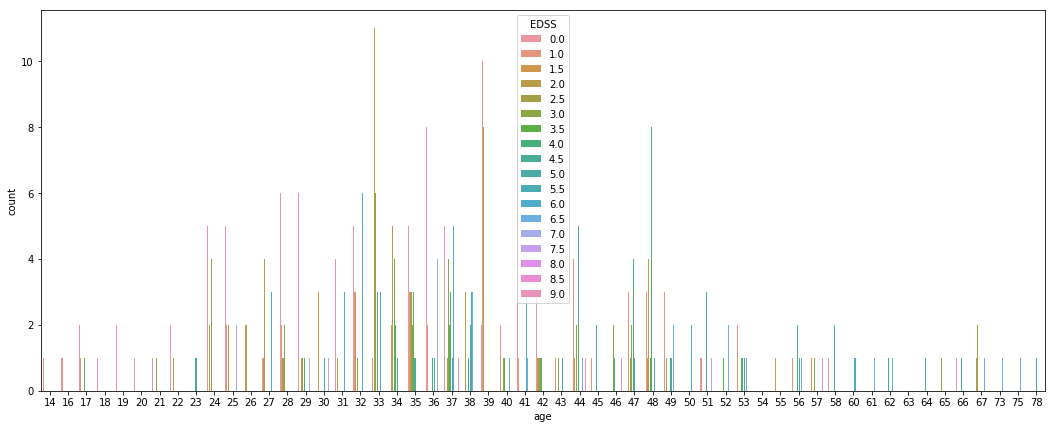

In [67]:
plt.figure(figsize=(18,7))
sns.countplot(x='age',data=df, hue='EDSS')

# Pre-processing

In [7]:
"""
I'm going ahead with some classic pre-processing strategies namely,
- getting path and arranging images in a 3D format
- min-max normalizations
- resahping the image
- keras data augm
"""

"\nI'm going ahead with some classic pre-processing strategies namely,\n- getting path and arranging images in a 3D format\n- min-max normalizations\n- resahping the image\n- keras data augm\n"

In [2]:
class ImagePreprocess(object):
    """
    Class for preparing images
    """
    def __init__(self, resize, channels, norm_type):
        
        self.resize = resize
        self.channels = channels
        self.norm_type = norm_type
     
    def __rescale(self, image):
        """
        Resize and rescale the image
        """
        
        image = cv2.resize(image, (self.resize, self.resize))
        return image.reshape((self.resize, self.resize, self.channels))
        
    def __normalize(self, image):
        """
        Channel-wise normalization
        """
        
        if self.norm_type == 'min-max':
            return np.float32((image - np.min(image))/(0.00001+(np.max(image) - np.min(image))))
        
        elif self.norm_type == 'mean-var':
            return np.float32((image - np.mean(image))/((np.std(image)+0.00001)))
        
        else:
            raise ValueError("Un-identified parameter value, ntype : {}".format(ntype))
    
    def preproc_image(self, image):
        """
        Pre-process the image
        """
        normalized_img = self.__normalize(image)
        rescaled_img = self.__rescale(normalized_img)
            
        return rescaled_img 
        

In [114]:
class GetData(object):
    """
    Class for putting together the training data 
    """
    
    def __init__(self, exam_paths, df_path):
        
        self.exam_paths = exam_paths 
        self.df_path = df_path
        
        #super().__init__(**kwargs)
        
        
    def __get_DCMPaths(self, exam_path):
        """
        Get all examination paths
        """
        return glob.glob(exam_path + '/*')
        
        
    def __get_ExamLabel(self, exam_number):
        """
        Get EDSS exam label
        """
        df = pd.read_excel(self.df_path, sheet_name='Feuil1')
        return df[df['Sequence_id'] == exam_number]['EDSS'].values[0]
        
    
#     def __get_3DImage(self, exam_DCMPaths):
#         """
#         Open dcm files, read image, preprocess them
#         """
#         image_PathList = []
#         target_path = '/home/allwyn/JFRDataChallenge/data/'
#         no_good_paths = ['/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480869998469389.dcm']
#         exam_number = exam_DCMPaths[0].split('/')[-2]

#         for n, path in enumerate(exam_DCMPaths):
            
#             if os.path.exists('../data/' + exam_number):
#                 pass
#             else:
#                 os.mkdir('../data/' + exam_number)
#                 print(exam_number)
            
#             if path in no_good_paths:
#                 continue

#             dataset = pydicom.dcmread(path)                  # Read dcm file
#             image = dataset.pixel_array                      # Get image from dcm file
#             save_path = target_path + exam_number +  "/image_" + str(n+1) + ".png"
#             try:                
#                 with open(save_path, "wb") as f:
#                     writer = png.Writer(width=image.shape[1], height=image.shape[0],
#                                         greyscale=True, alpha=False, bitdepth=16)
#                     writer.write(f, image)
#             except:
#                 print(save_path)
                
#             image_PathList.append(save_path)  # pre-process the image
           
#         # Get exam EDSS label
#         label = self.__get_ExamLabel(int(exam_number))
        
#         return image_PathList, label
        
    def __get_3DImage(self, exam_DCMPaths):
        """
        Open dcm files, read image, preprocess them
        """
        image_PathList, image_array_list = [], []
        target_path = '/home/allwyn/JFRDataChallenge/data/'
        no_good_paths = ['/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480869998469389.dcm']
        exam_number = exam_DCMPaths[0].split('/')[-2]
        
        
        dataset = pydicom.dcmread(random.choice(exam_DCMPaths))               
        image = dataset.pixel_array   
        image_array = np.zeros((len(exam_DCMPaths), image.shape[0], image.shape[1]))


        for n, path in enumerate(exam_DCMPaths):
            
            if os.path.exists('../data/' + exam_number):
                pass
            else:
                os.mkdir('../data/' + exam_number)
                print(exam_number)
            
            if path in no_good_paths:
                continue

            dataset = pydicom.dcmread(path)                  # Read dcm file
            image = dataset.pixel_array                      # Get image from dcm file            
            image_array[n] = image
            image_PathList.append(save_path)  
            
        # Get exam EDSS label
        save_path = target_path + exam_number +  "/" + exam_number 
        np.save(save_path, image_array)
        
        label = self.__get_ExamLabel(int(exam_number))
        
        return image_PathList, label
    
    
    def save_dataset(self):
        """
        Constructs the dataset
        """
        
        data_MRIImages = []
        data_MRILables = []
        
        for exam_path in tqdm(self.exam_paths):

            exam_DCMPaths = self.__get_DCMPaths(exam_path)
            image_PathList, label = self.__get_3DImage(exam_DCMPaths)

            data_MRIImages.append(image_PathList)
            data_MRILables.append(label)
                                 
        return data_MRIImages, data_MRILables



In [115]:
base_path = '/home/alex/Dataset 1/'
remove = ['Dataset - 1.xlsx']
exam_paths = glob.glob(base_path + '/*')
exam_paths = [i for i in exam_paths if i.split('/')[-1] not in remove]
resize = 299
channels = 1
norm_type = 'min-max'

df_path = base_path + 'Dataset - 1.xlsx'

g = GetData(exam_paths, df_path)

In [116]:
data_MRIImages, data_MRILabels  = g.save_dataset()




  0%|          | 0/480 [00:00<?, ?it/s]


  0%|          | 1/480 [00:02<16:11,  2.03s/it]


  0%|          | 2/480 [00:02<11:49,  1.48s/it]


  1%|          | 3/480 [00:04<13:24,  1.69s/it]


  1%|          | 4/480 [00:04<09:39,  1.22s/it]


  1%|          | 5/480 [00:04<07:08,  1.11it/s]


  1%|▏         | 6/480 [00:06<09:59,  1.27s/it]


  1%|▏         | 7/480 [00:06<07:14,  1.09it/s]


  2%|▏         | 8/480 [00:07<05:28,  1.44it/s]


  2%|▏         | 9/480 [00:07<04:03,  1.93it/s]


  2%|▏         | 10/480 [00:07<03:15,  2.40it/s]


  2%|▏         | 11/480 [00:09<06:37,  1.18it/s]


  2%|▎         | 12/480 [00:11<09:04,  1.16s/it]


  3%|▎         | 13/480 [00:11<07:06,  1.10it/s]


  3%|▎         | 14/480 [00:13<09:48,  1.26s/it]


  3%|▎         | 15/480 [00:13<07:06,  1.09it/s]


  3%|▎         | 16/480 [00:17<13:14,  1.71s/it]


  4%|▎         | 17/480 [00:17<09:31,  1.23s/it]


  4%|▍         | 18/480 [00:17<07:56,  1.03s/it]


  4%|▍         | 19/480 [00:19<09:48,  1.28s/i

ValueError: could not broadcast input array from shape (192,192) into shape (256,224)

In [80]:
glob.glob('/home/alex/Dataset 1/100124/*.dcm')

['/home/alex/Dataset 1/100124/1.3.12.2.1107.5.2.36.40679.2015102317230118030895138.dcm',
 '/home/alex/Dataset 1/100124/1.3.12.2.1107.5.2.36.40679.2015102317224634537294870.dcm',
 '/home/alex/Dataset 1/100124/1.3.12.2.1107.5.2.36.40679.2015102317231272898095621.dcm',
 '/home/alex/Dataset 1/100124/1.3.12.2.1107.5.2.36.40679.2015102317223381751294600.dcm',
 '/home/alex/Dataset 1/100124/1.3.12.2.1107.5.2.36.40679.2015102317230313048995455.dcm',
 '/home/alex/Dataset 1/100124/1.3.12.2.1107.5.2.36.40679.2015102317225385412695033.dcm',
 '/home/alex/Dataset 1/100124/1.3.12.2.1107.5.2.36.40679.2015102317225370900395029.dcm',
 '/home/alex/Dataset 1/100124/1.3.12.2.1107.5.2.36.40679.2015102317225370195095028.dcm',
 '/home/alex/Dataset 1/100124/1.3.12.2.1107.5.2.36.40679.201510231722529235694982.dcm',
 '/home/alex/Dataset 1/100124/1.3.12.2.1107.5.2.36.40679.2015102317225313380194997.dcm',
 '/home/alex/Dataset 1/100124/1.3.12.2.1107.5.2.36.40679.2015102317224843626594904.dcm',
 '/home/alex/Dataset 1

In [ ]:
"""

13658
/home/allwyn/JFRDataChallenge/data/13658/image_1.png
/home/allwyn/JFRDataChallenge/data/13658/image_2.png
/home/allwyn/JFRDataChallenge/data/13658/image_3.png
/home/allwyn/JFRDataChallenge/data/13658/image_4.png
/home/allwyn/JFRDataChallenge/data/13658/image_5.png
/home/allwyn/JFRDataChallenge/data/13658/image_6.png
/home/allwyn/JFRDataChallenge/data/13658/image_7.png
/home/allwyn/JFRDataChallenge/data/13658/image_8.png
/home/allwyn/JFRDataChallenge/data/13658/image_9.png
/home/allwyn/JFRDataChallenge/data/13658/image_10.png
/home/allwyn/JFRDataChallenge/data/13658/image_11.png
/home/allwyn/JFRDataChallenge/data/13658/image_12.png

13656
/home/allwyn/JFRDataChallenge/data/13656/image_1.png
/home/allwyn/JFRDataChallenge/data/13656/image_2.png
/home/allwyn/JFRDataChallenge/data/13656/image_3.png
/home/allwyn/JFRDataChallenge/data/13656/image_4.png
/home/allwyn/JFRDataChallenge/data/13656/image_5.png
/home/allwyn/JFRDataChallenge/data/13656/image_6.png
/home/allwyn/JFRDataChallenge/data/13656/image_7.png
/home/allwyn/JFRDataChallenge/data/13656/image_8.png
/home/allwyn/JFRDataChallenge/data/13656/image_9.png
/home/allwyn/JFRDataChallenge/data/13656/image_10.png
/home/allwyn/JFRDataChallenge/data/13656/image_11.png
/home/allwyn/JFRDataChallenge/data/13656/image_12.png

20015
/home/allwyn/JFRDataChallenge/data/20015/image_1.png
/home/allwyn/JFRDataChallenge/data/20015/image_2.png
/home/allwyn/JFRDataChallenge/data/20015/image_3.png
/home/allwyn/JFRDataChallenge/data/20015/image_4.png
/home/allwyn/JFRDataChallenge/data/20015/image_5.png
/home/allwyn/JFRDataChallenge/data/20015/image_6.png
/home/allwyn/JFRDataChallenge/data/20015/image_7.png
/home/allwyn/JFRDataChallenge/data/20015/image_8.png
/home/allwyn/JFRDataChallenge/data/20015/image_9.png
/home/allwyn/JFRDataChallenge/data/20015/image_10.png
/home/allwyn/JFRDataChallenge/data/20015/image_11.png
/home/allwyn/JFRDataChallenge/data/20015/image_12.png
/home/allwyn/JFRDataChallenge/data/20015/image_13.png
/home/allwyn/JFRDataChallenge/data/20015/image_14.png
/home/allwyn/JFRDataChallenge/data/20015/image_15.png
/home/allwyn/JFRDataChallenge/data/20015/image_16.png
/home/allwyn/JFRDataChallenge/data/20015/image_17.png
/home/allwyn/JFRDataChallenge/data/20015/image_18.png
/home/allwyn/JFRDataChallenge/data/20015/image_19.png
/home/allwyn/JFRDataChallenge/data/20015/image_20.png
/home/allwyn/JFRDataChallenge/data/20015/image_21.png
/home/allwyn/JFRDataChallenge/data/20015/image_22.png

94184
/home/allwyn/JFRDataChallenge/data/94184/image_1.png
/home/allwyn/JFRDataChallenge/data/94184/image_3.png
/home/allwyn/JFRDataChallenge/data/94184/image_4.png
/home/allwyn/JFRDataChallenge/data/94184/image_5.png
/home/allwyn/JFRDataChallenge/data/94184/image_6.png
/home/allwyn/JFRDataChallenge/data/94184/image_7.png
/home/allwyn/JFRDataChallenge/data/94184/image_8.png
/home/allwyn/JFRDataChallenge/data/94184/image_9.png
/home/allwyn/JFRDataChallenge/data/94184/image_10.png
/home/allwyn/JFRDataChallenge/data/94184/image_12.png
/home/allwyn/JFRDataChallenge/data/94184/image_13.png
/home/allwyn/JFRDataChallenge/data/94184/image_14.png
/home/allwyn/JFRDataChallenge/data/94184/image_15.png
/home/allwyn/JFRDataChallenge/data/94184/image_16.png
/home/allwyn/JFRDataChallenge/data/94184/image_17.png
/home/allwyn/JFRDataChallenge/data/94184/image_18.png
/home/allwyn/JFRDataChallenge/data/94184/image_19.png
/home/allwyn/JFRDataChallenge/data/94184/image_20.png
/home/allwyn/JFRDataChallenge/data/94184/image_21.png
/home/allwyn/JFRDataChallenge/data/94184/image_22.png
/home/allwyn/JFRDataChallenge/data/94184/image_23.png
/home/allwyn/JFRDataChallenge/data/94184/image_25.png
/home/allwyn/JFRDataChallenge/data/94184/image_26.png
/home/allwyn/JFRDataChallenge/data/94184/image_27.png
/home/allwyn/JFRDataChallenge/data/94184/image_28.png
/home/allwyn/JFRDataChallenge/data/94184/image_29.png
/home/allwyn/JFRDataChallenge/data/94184/image_30.png
23847
"""

In [27]:
image = cv2.imread('/home/allwyn/JFRDataChallenge/data/25826/image_10.png', 0)

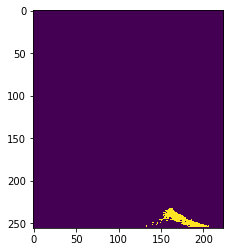

In [28]:
plt.imshow(image)

In [ ]:
# # Save files 
# with open('../data/data_MRIImages.pkl', 'wb') as f:
#     pickle.dump(data_MRIImages, f)
# with open('../data/data_MRILabels.pkl', 'wb') as f:
#     pickle.dump(data_MRILabels, f)


In [3]:
# Open files
with open('../data/data_MRIImages.pkl', 'rb') as f:
    data_MRIImages = pickle.load(f)
    
with open('../data/data_MRILabels.pkl', 'rb') as f:
    data_MRILabels = pickle.load(f)

In [48]:
import imgaug as ia
from imgaug import augmenters as iaa

class ImageBaseAug(object):
    def __init__(self):
        sometimes = lambda aug: iaa.Sometimes(0.5, aug)
        self.seq = iaa.Sequential(
            [
                # Blur each image with varying strength using
                # gaussian blur (sigma between 0 and 3.0),
                # average/uniform blur (kernel size between 2x2 and 7x7)
                # median blur (kernel size between 3x3 and 11x11).
                iaa.OneOf([
                    iaa.GaussianBlur((0, 1.0)),
                    iaa.AverageBlur(k=(2, 5)),
                    iaa.MedianBlur(k=(3, 11)),
                ]),
                # Sharpen each image, overlay the result with the original
                # image using an alpha between 0 (no sharpening) and 1
                # (full sharpening effect).
                sometimes(iaa.Sharpen(alpha=(0, 0.5), lightness=(0.75, 1.5))),
                # Add gaussian noise to some images.
                sometimes(iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5)),
                # Add a value of -5 to 5 to each pixel.
                sometimes(iaa.Add((-5, 5), per_channel=0.5)),
                # Change brightness of images (80-120% of original value).
                sometimes(iaa.Multiply((0.8, 1.2), per_channel=0.5)),
                # Improve or worsen the contrast of images.
                sometimes(iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5)),
            ],
            # do all of the above augmentations in random order
            random_order=True
        )

    def __call__(self, image):
        seq_det = self.seq.to_deterministic()
        print(seq_det)
        #image, label = #sample['image'], sample['label']
        image = seq_det.augment_images([image])[0]
        return image #{'image': image, 'label': label}

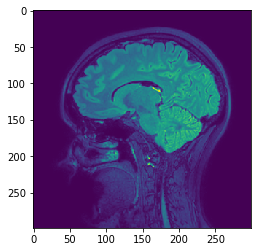

In [83]:
plt.imshow(data_MRIImages[0][0].squeeze())

In [114]:
1 - (np.sum(data_MRIImages[0][0] == 0)/(299*299))

0.6408765002628606

In [112]:
np.sum(data_MRIImages[0][0].squeeze() == 0) / (299*299)

0.3591234997371394

In [82]:
data_MRIImages[0][0].shape

(299, 299, 1)

Sequential(name=UnnamedSequential, random_order=True, children=[SomeOf(name=UnnamedSomeOf, n=1, random_order=False, augmenters=[GaussianBlur(name=UnnamedGaussianBlur, parameters=[Uniform(Deterministic(int 0), Deterministic(float 1.00000000))], deterministic=True)], deterministic=True), Sometimes(p=Binomial(Deterministic(float 0.50000000)), name=UnnamedSometimes, then_list=Sequential(name=UnnamedSometimes-then, random_order=False, children=[Convolve(name=UnnamedSharpen, parameters=[<function Sharpen.<locals>.create_matrices at 0x7f3b9d3621e0>, function], deterministic=True)], deterministic=True), else_list=None, deterministic=True), Sometimes(p=Binomial(Deterministic(float 0.50000000)), name=UnnamedSometimes, then_list=Sequential(name=UnnamedSometimes-then, random_order=False, children=[AddElementwise(name=UnnamedAdditiveGaussianNoise, parameters=[Normal(loc=Deterministic(int 0), scale=Uniform(Deterministic(float 0.00000000), Deterministic(float 12.75000000))), Binomial(Deterministic(fl

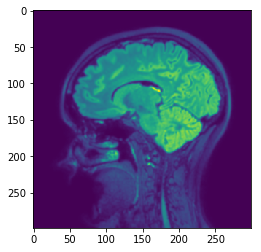

In [53]:
img = au(data_MRIImages[0][0])
plt.imshow(img.squeeze())

In [78]:
a = cv2.fastNlMeansDenoising(data_MRIImages[0][0], None, 1, normType=cv2.NORM_L2)

error: OpenCV(3.4.2) /io/opencv/modules/photo/src/denoising.cpp:120: error: (-215:Assertion failed) hn == 1 || hn == cn in function 'fastNlMeansDenoising'


# References

https://www.kaggle.com/shivamb/3d-convolutions-understanding-use-case


# Issues 

- Exams in dataset have missing dcm files (eg: .dcm file states that exam contians 35 slices, but only 22 were to be found)
- Few dcm files have corrupt images, hence can't be opened
- Some dcm files within an exam have similar instance numbers but different images
- Some exams have images taken from differnet angles (could explain the reason as to why images have 
- No point sorting images, as a good percentage of the exams don't have missing or mixed elements 

# Questions

In [8]:
"""
- What is Slice Thickness
- What is spacing between slices
- What's the deal with Acquisition Contrast and 
- Difference between (3D Flair et axial T2 Flair)
- Est-ce que c'est normal de faire la suivi d'un patient avec
des image ayant des modalités differnet ?
"""

"\n- What is Slice Thickness\n- What is spacing between slices\n- What's the deal with Acquisition Contrast and \n- Difference between (3D Flair et axial T2 Flair)\n- Est-ce que c'est normal de faire la suivi d'un patient avec\ndes image ayant des modalités differnet ?\n"

# Archive

In [249]:
class ImagePreprocess(object):
    """
    Class for preparing images
    """
    def __init__(self, resize, normalization, channels=1):


        self.channels = channels
        self.image_resize = resize
        self.normalization = normalization

    def __rescale(self, image):
        """
        Resize and rescale the image
        """

        image = cv2.resize(image, (self.image_resize, self.image_resize))
        return image.reshape(( self.channels, self.image_resize, self.image_resize))

    def __normalize(self, image):
        """
        Channel-wise normalization
        """

        if self.normalization == 'min-max':
            return np.float32((image - np.min(image))/(0.00001+(np.max(image) - np.min(image))))

        elif self.normalization == 'mean-var':
            return np.float32((image - np.mean(image))/((np.std(image)+0.00001)))

        else:
            raise ValueError("Un-identified parameter value, ntype : {}".format(ntype))

    def preproc_image(self, image):
        """
        Pre-process the image by applying normalization and 
        resizing
        """
        normalized_img = self.__normalize(image)
        rescaled_img = self.__rescale(normalized_img)

        return rescaled_img 


    def transform_images(self, image, transformation='original', angle=30):
        """
        Method to generate images based on the requested transfomations
        Args:
        - image             (nd.array)  : input image array
        - transformation    (str)       : image transformation to be effectuated
        - angle 		(int)	    : rotation angle if transformation is a rotation
        Returns:
        - trans_image       (nd.array)  : transformed image array
        """
        
        def rotateImage(image, angle):
            """
            Function to rotate an image at its center
            """
            image_center = tuple(np.array(image.shape[1::-1]) / 2)
            rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
            result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
            return result

        # Image transformations
        if transformation == 'original':
            trans_image = image
        elif transformation == 'flip_v':
            trans_image = cv2.flip(image, 0)
        elif transformation == 'flip_h':
            trans_image = cv2.flip(image, 1)
        elif transformation == 'flip_vh':
            trans_image = cv2.flip(image, -1)
        elif transformation == 'rot_c':
            trans_image = rotateImage(image, -angle)
        elif transformation == 'rot_ac':
            trans_image = rotateImage(image, angle)
        else:
            raise ValueError("In valid transformation value passed : {}".format(transformation))

        return trans_image



In [258]:
import glob

import cv2

import pydicom
from pydicom.data import get_testdata_files


class SEP_generator(ImagePreprocess):
    
    def __init__(self, patient_InfoDatabase, base_DatabasePath, **kwargs):
        """
        Args:
        - patient_information	(list) : list of tuples : (patient_id, patient_edss_score) 

        """
        self.resize 									= kwargs['resize']
        self.patient_InfoDatabase						= patient_information
        self.base_DatabasePath                          = base_DatabasePath
        self.nogood_DCMPaths 							= ['/home/alex/Dataset 1/26108/1.3.12.2.1107.5.2.18.41433.2015031912480869998469389.dcm']

        super().__init__(**kwargs)

    def __get_DCMFilePaths(self, patient_information, base_DatabasePath='/home/alex/Dataset 1'):
        """
        Internal method to get path towards patient dcm files
        """
        patient_id, patient_label = patient_information
        patient_path = base_DatabasePath + '/' + str(patient_id) + '/*.dcm'

        patient_dcm_FilePaths = glob.glob(patient_path)

        return patient_dcm_FilePaths, patient_label


    def __extract_DCMImage(self, dcm_path):

        dataset = pydicom.dcmread(dcm_path)       	# Read dcm file
        image = dataset.pixel_array					# Exctact image from dcm files 

        return image


    def generator(self, max_slices=70, dark_matter=0.7):

        """
        Args:
        - max_slices	(int) 		: number of allowed slices per patient
        - dark_matter 	(int) 		: ratio of dark matter accepted in an image

        Yields:
        - image_3D		(nd.array)	:
        - patient_label	(float)		:
        """

        itr = 1
        limit = len(self.patient_InfoDatabase)

        while True:
            
            patient_information = self.patient_InfoDatabase[itr]
            print("Iteration : {}".format(itr, patient_information))
            # Get list of patient dcm file paths and respective scores
            # [[p1_01.dmc, ..  p1_99.dcm], p1_label]
            patient_dcm_FilePaths, patient_label 	= self.__get_DCMFilePaths(patient_information, base_DatabasePath)

            # Select a random transformation 
            transformation = random.choice(['original', 'flip_v', 'flip_h', 'flip_vh', 'rot_c', 'rot_ac'])
            
            # Create array of zeors # (x, 1, 299, 299) --> (slices, channels, height, width)
            darkmatter_idx 	= []
            image_3D 		= np.zeros((len(patient_dcm_FilePaths), 1, self.resize, self.resize))

            # Create array with relevant images from dcm files
            for n, patient_dcm_FilePath in enumerate(patient_dcm_FilePaths):
                #print("Dcm file number : {}".format(n))
                # Some dcm files are corrupted, ignore thme
                if patient_dcm_FilePath in self.nogood_DCMPaths:
                    continue

                dcm_image 		= self.__extract_DCMImage(patient_dcm_FilePath)			# extract image from .dcm file
                preproc_image 	= self.preproc_image(dcm_image)							# preprocess image
                transform_image = self.transform_images(preproc_image, transformation)	# transform the image
                image_3D[n]		= transform_image 										# add transformed image to 3D-array
                dark_matter 	= np.sum(preproc_image == 0) / (self.resize**2)			# get amount of dark matter contained in image
                darkmatter_idx.append((dark_matter, n))

            relevant_idx = [item[1] for item in sorted(darkmatter_idx)][:max_slices]

            yield image_3D[relevant_idx], patient_label

            itr += 1

            if itr == limit:
                itr == 0

In [259]:
edss = df['EDSS'].tolist()
p_id = df['Sequence_id'].tolist()
channels = 1
resize = 299
normalization = 'min-max'

patient_information = [(p_id[i], edss[i]) for i in range(df.shape[0])]
base_DatabasePath = '/home/alex/Dataset 1'
gen = SEP_generator(patient_information, base_DatabasePath, 
                                           channels=channels,
                                           resize=resize,
                                           normalization=normalization)

In [260]:
a = gen.generator()

In [ ]:
for i in a:
    a = i
    
    

Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 9
Iteration : 10
Iteration : 11
Iteration : 12
Iteration : 13
Iteration : 14
Iteration : 15
Iteration : 16
Iteration : 17
Iteration : 18
Iteration : 19
Iteration : 20
Iteration : 21
Iteration : 22
Iteration : 23
Iteration : 24
Iteration : 25
Iteration : 26
Iteration : 27
Iteration : 28
Iteration : 29
Iteration : 30
Iteration : 31
Iteration : 32
Iteration : 33
Iteration : 34
Iteration : 35
Iteration : 36
Iteration : 37
Iteration : 38
Iteration : 39
Iteration : 40
Iteration : 41
Iteration : 42
Iteration : 43
Iteration : 44
Iteration : 45
Iteration : 46
Iteration : 47
Iteration : 48
Iteration : 49
Iteration : 50
Iteration : 51
Iteration : 52
Iteration : 53
Iteration : 54
Iteration : 55
Iteration : 56
Iteration : 57
Iteration : 58
Iteration : 59
Iteration : 60
Iteration : 61
Iteration : 62
Iteration : 63
Iteration : 64
Iteration : 65
Iteration : 66
Iteration : 67
Iter

In [4]:
patients = glob.glob('/home/alex/Dataset 1/*')

In [9]:
a = 0
for patient in patients:
    a += len(glob.glob(patient + '/*dcm'))
    print(patient.split('/')[-1], len(glob.glob(patient + '/*dcm')))

10874 365
12924 35
76057 365
44732 30
10075 27
9131 300
96973 25
68149 26
22535 24
20823 42
10441 248
12203 277
56540 25
28246 365
92348 25
12314 277
23690 24
26159 160
89987 320
23819 192
31467 24
64376 160
50941 24
32305 24
24992 24
10073 24
19785 24
51001 24
96469 25
56251 24
19015 46
9934 27
68281 224
74257 176
13150 261
44758 29
12789 277
101124 86
10187 24
50854 24
13054 271
97121 25
68283 16
12798 224
13658 12
25826 120
30083 24
74499 365
13659 12
21566 54
16263 46
101772 176
86794 50
75056 144
68331 24
85678 176
95675 176
15752 160
15727 160
91931 27
23805 24
40086 24
31282 39
10578 27
22246 160
28200 365
26637 176
9859 158
26200 160
23639 32
55200 112
9815 174
12849 277
9059 300
26196 40
8151 365
49620 26
26108 22
26201 40
18428 24
22942 29
16572 176
20471 29
7591 365
26198 23
40088 24
19963 24
64325 176
12289 277
20142 24
44531 39
10244 365
71308 365
54257 300
12812 224
9108 283
9178 300
49668 24
19949 24
9215 300
49669 24
64882 24
31716 29
77266 176
51136 46
19855 51
56491 2

In [11]:
100%10

0

In [11]:
import torch
import torchvision
import torchvision.transforms as transforms

In [12]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


In [19]:
for i, data in enumerate(trainloader, 0):
    print(data[0].shape, data[1])
    break

torch.Size([4, 3, 32, 32]) tensor([7, 8, 7, 2])


In [24]:
a = np.array([[0,1,0,0],[1,0,0,0],[0,0,0,1]])


In [33]:
[np.where(r==1)[0][0] for r in a]

[5, 5, 5, 5, 5]

In [43]:

class CcocGenerator(object):

    """
    Creates generator object for COCO images
    """

    def __init__(self, 
                 base_path='/media/data/Coco/', 
                 resize=229, 
                 batch_size=64):
        """
        The init method called during class instantiation
        Args:
        - base_path     (str) : path towards the cooc directory 
        - resize        (int) : dimensions to which image should be resized
        - batch_size    (int) : sise of batch
        """

        self.resize         = resize
        self.base_path      = base_path
        self.batch_size     = batch_size


    def __read_df(self, dataset):
        """
        The method is used to read csv file and extract paths and labels
        Args:
        - dataset   (str)       : string indicating train or validation csv file
        Returns:
        - paths     (list)      : list of image paths
        - labels    (nd.array)  : array of labels for corresponding images
        """
        
        df = pd.read_csv(self.base_path + dataset + '2017.csv')
        paths = df['Paths'].tolist()
        labels = df.drop(['Paths'], axis=1).values
        
        return paths, labels


    def __read_image(self, image_path, channels):
        """
        The method reads an image given its path
        Args:
        - image_path    (str)       : path of the image file
        - channels      (int)       : number of channels the read image should have
        Returns:
        - image         (nd.array)  : array representing image pixels 
        """
        
        if channels == 3:
            image = cv2.imread(image_path)
        elif channels == 1:
            image = cv2.imread(image_path, 0)      
        else:
            raise ValueError("Channels value not supported : {}".format(channels))
            
        return image


    def __image_preproc(self, image):
        """
        The method performs required preprocessing on the image
        Args:
        - image     (nd.array)  : image array 
        - resize    (int)       : size to which the image ought to be resized
        Returns
        - image     (nd.array)  : image array that underwent preprocessing
        """
    
        # image resizing
        image = cv2.resize(image, (self.resize, self.resize))
        # min-max normalization 
        image = np.float32((image - np.min(image))/(0.00001+(np.max(image) - np.min(image))))
        
        return image


    def generator(self, dataset, channels=3):
        """
        Method that returns a generator object
        Args:
        - dataset       (str)       : string indicating train or validation set
        - channels      (int)       : number of channels the images have
        Yields:
        - batch_images  (nd.array)  : a batch of images of shape (batch_size, rows, cols, channesl)
        - batch_labels  (nd,array)  : a batch of labels of shape (batch_size, classes)
        """
        
        paths, labels = self.__read_df(dataset)
        steps = int(len(paths)/self.batch_size)
    
        # Intialization to keep track of generator
        itr = 0
        step = 0
            
        # Iterate through batches 
        # Used while loop instead of for loop beacause keras fit_generator
        # thows stop iteration exception with for loop
        while True: 
            
            # Get batch of image paths and their corresponding labels
            batch_paths = paths[itr:itr+self.batch_size]
            batch_labels = labels[itr:itr+self.batch_size, :]
            
            # Create batch array of zeros for image array
            batch_images = np.zeros((len(batch_paths), channels, self.resize, self.resize))
            
            for n, path in enumerate(batch_paths):
                
                temp_image = self.__read_image(path, channels)
                temp_image = self.__image_preproc(temp_image)
                
                if len(temp_image.shape) == 2:
                    temp_image = np.resize(temp_image, (1, temp_image.shape[0], 
                                                        temp_image.shape[1]))
                
                batch_images[n] = temp_image
                
#             print(batch_labels)
#             batch_labels = [np.where(r==1)[0][0] for r in batch_labels]
#             print(batch_labels)

            yield batch_images, batch_labels
            
            itr += self.batch_size
            step += 1

            if step == steps:
                itr = 0
                step = 0

In [44]:
coco = CcocGenerator(base_path='/media/data/Coco/', resize=299, batch_size=48)

train_generator = coco.generator(dataset='train', channels=1)
valid_generator = coco.generator(dataset='val', channels=1)

In [45]:
for n, data in enumerate(train_generator):
    image = data[0]
    label = data[1]
    print(data[0].shape, data[1])
    break

(48, 1, 299, 299) [[0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0.

In [54]:
label

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0.,

In [55]:
[np.where(r==1)[0][0] for r in label]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [59]:
for i in label:
    print(np.where(i==1)[0][0])

5
3
5
0
0
1
4
3
5
3
1
3
3
2
3
0
3
1
4
3
5
4
1
5
0
5
1
3
1
5
5
5
1
0
3
3
1
1
4
3
2
3
4
4
3
3


IndexError: index 0 is out of bounds for axis 0 with size 0

In [60]:
a

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.]])